# example V4 eye-movement for Seth

# Section 1: step-by-step explanation of the data

This examplain how I processed the data before saving it.  You may not have the packages and data to run this section


In [1]:
# standard packages
import os
import sys
import numpy as np
import pandas as pd         # pandas tabular DataFrame for task/behavioral data
import matplotlib as mpl    # plot
import matplotlib.pyplot as plt
import pickle
import warnings

# custom packages for neural data
import dg2df                # for DLSH dynamic group (behavioral data)
import neo                  # data structure for neural data
import signal_align         # in this package: align neural data according to task
import data_load_DLSH       # package specific for DLSH lab data


/shared/homes/sguan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Load data from an example day

In [2]:
# specify data path
dir_tdt_tank = '/shared/lab/projects/encounter/data/TDT'
dir_dg = '/shared/lab/projects/analysis/shaobo/data_dg'

# specify data to use
keyword_tank='GM32_U16-161015.*'
keyword_blk = '.*srv_mask'

# load data
[blk, data_df, name_tdt_blocks] = data_load_DLSH.load_data(
    keyword_blk, keyword_tank,
    dir_tdt_tank=dir_tdt_tank, dir_dg=dir_dg,
    tf_interactive=False, tf_verbose=False)
data_df_org = data_df

## Understand the behaviral data

The pandas dataframe data_df contains all behaviral information, the above form listsed some important columns

Every row is every trial

### important time points in a trial

Here is the description of columns

* obsid: "obs" here refers to observation period, or more commonly called as trial, behaviral data are stroed only during observation periods
* obson: the onset time of every obs
* fixon: fiaxion spot onset time, relative to obs onset (ms)
* stimon: onset time the image sequence (ms)
* stimoff: offset time of the image sequence (ms)
* fixjump: time when the fixation spot jumps to one of four possible locations (ms)
* endobs: the offset time of the obs (ms) 
 


In [3]:
# show eye-movement related colums of behavior data
print(data_df_org.keys())
data_df = data_df_org[data_df_org['order'] == 0]
data_df.reset_index(inplace=True)
data_df = data_df.assign(obson=0)
data_df = data_df.assign(stimoff=data_df['stimon'] + 400*5)

# show columns containing important time points
data_df[['obsid', 'obson', 'fixon', 'stimon', 'stimoff', 'fixjump', 'endobs']].head(n=10)

Index(['datecode', 'day', 'edge_blur', 'ems', 'endobs', 'endtrial', 'eyedist',
       'file', 'fileid', 'fixjump', 'fixjump_pos', 'fixoff', 'fixon',
       'grayscale', 'ids', 'mask_extensions', 'mask_index', 'mask_linearity',
       'mask_names', 'mask_opacity', 'mask_orientation', 'mask_paths',
       'mask_scale', 'month', 'nsaccades', 'obsid', 'order', 'reward_times',
       'sacamps', 'sacdirs', 'sacfroms', 'sacstops', 'sactimes', 'sactos',
       'sacvels', 'stim_categories', 'stim_durations', 'stim_extensions',
       'stim_familiarized', 'stim_names', 'stim_paths', 'stim_posttimes',
       'stim_rotations', 'stim_scales', 'stim_types', 'stimoff', 'stimon',
       'stimtype', 'subj', 'targecc', 'year', 'filename', 'fileindex', ''],
      dtype='object')


,obsid,obson,fixon,stimon,stimoff,fixjump,endobs
0,2,0,9,719,2719,3511,3701
1,3,0,9,529,2529,3321,3491
2,4,0,7,527,2527,3319,3519
3,6,0,4,664,2664,3456,3596
4,7,0,3,653,2653,3445,3615
5,8,0,6,526,2526,3318,3518
6,9,0,7,2208,4208,5000,5170
7,12,0,6,616,2616,3408,3558
8,13,0,6,1407,3407,4199,4399
9,14,0,11,531,2531,3323,3483


## Eyemovement information

the eye position is stored in columm 'ems', every cell of ems contains three items:

0. sampling time (5 means 5 ms per sample)
1. x positions, from obs onset
2. y positions, from obs onset

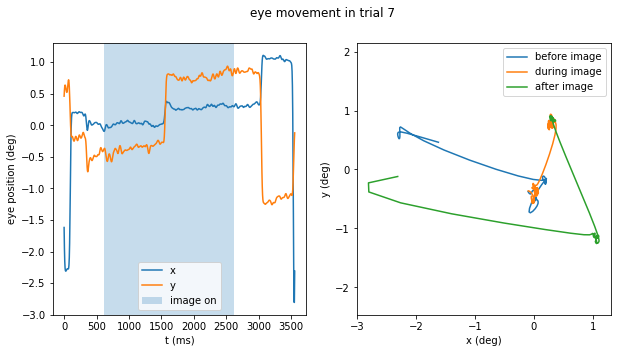

In [4]:
# plot eye trace in one trial
trial_index = 7

x = data_df.loc[trial_index, 'ems'][1]
y = data_df.loc[trial_index, 'ems'][2]
t = np.arange(len(data_df.loc[trial_index, 'ems'][1])) * data_df.loc[trial_index, 'ems'][0]
t_stimon  = data_df.loc[trial_index, 'stimon']
t_stimoff = data_df.loc[trial_index, 'stimoff']

_, h_axes = plt.subplots(1, 2, figsize=(10, 5), squeeze=False)
plt.axes(h_axes[0, 0])
plt.plot(t, x)
plt.plot(t, y)
plt.axvspan(xmin=t_stimon, xmax=t_stimoff, alpha=0.25)
plt.xlabel('t (ms)')
plt.ylabel('eye position (deg)')
plt.legend(['x', 'y', 'image on'])
plt.axes(h_axes[0, 1])
plt.plot(x[t<t_stimon], y[t<t_stimon])
plt.plot(x[(t>=t_stimon) & (t<t_stimoff)], y[(t>=t_stimon) & (t<t_stimoff)])
plt.plot(x[t>=t_stimoff], y[t>=t_stimoff])
plt.xlabel('x (deg)')
plt.ylabel('y (deg)')
plt.legend(['before image', 'during image', 'after image'])
plt.axis('equal')
plt.suptitle('eye movement in trial {}'.format(trial_index))
plt.show()
plt.close()


## Align neural data to trial

the variable `blk` contains the neural data in the universial neo format (neuralensemble.org/neo), which is a continuousely sampled spikes/LFPs of the full block.

We here want to align the data to the onset of every trial

In [6]:
data_df = data_load_DLSH.standardize_data_df(data_df)
blk     = data_load_DLSH.standardize_blk(blk)

# align data to obson (the start of trial)
ts_StimOn = data_load_DLSH.get_ts_align(blk, data_df, dg_tos_align='obson')

# for every trial, use data from 0.0 sec to 4.0 sec relative to obson 
window_offset = [0.0, 4.0]

# align neural data, use only LFPs
data_neuro=signal_align.blk_align_to_evt(blk, ts_StimOn, window_offset,
                                             type_filter='analogsignal.*', name_filter='LFPs.*$')

print('the result is a dictionary containing for following keys: {}'.format(list(data_neuro.keys())))

print('"data" contains the trial aligned LFP data (in Volt), of shape (num_trials, num_timestamps, num_channels), : {}'.format(data_neuro['data'].shape))
print('"ts" is a 1D array that contains the timestamps')
print('"signal_info" contains the information of every channel, below are several example channels')

data_neuro['signal_info'][:4]

the result is a dictionary containing for following keys: ['data', 'ts', 'signal_info']
"data" contains the trial aligned LFP data (in Volt), of shape (num_trials, num_timestamps, num_channels), : (480, 4069, 48)
"ts" is a 1D array that contains the timestamps
"signal_info" contains the information of every channel, below are several example channels


array([('LFPs 1', 'analogsignals', 1017.25262451, 1, 0),
       ('LFPs 2', 'analogsignals', 1017.25262451, 2, 0),
       ('LFPs 3', 'analogsignals', 1017.25262451, 3, 0),
       ('LFPs 4', 'analogsignals', 1017.25262451, 4, 0)],
      dtype=[('name', '<U32'), ('type', '<U32'), ('sampling_rate', '<f8'), ('channel_index', '<i8'), ('sort_code', '<i8')])

In this dataset chan 1~32 are in V4, chan 33~48 are in IT

chan 13, 23, 24, 27, 29, 30, 31 are problematic, do not use

Below is the eye position and LFP from a esample trial

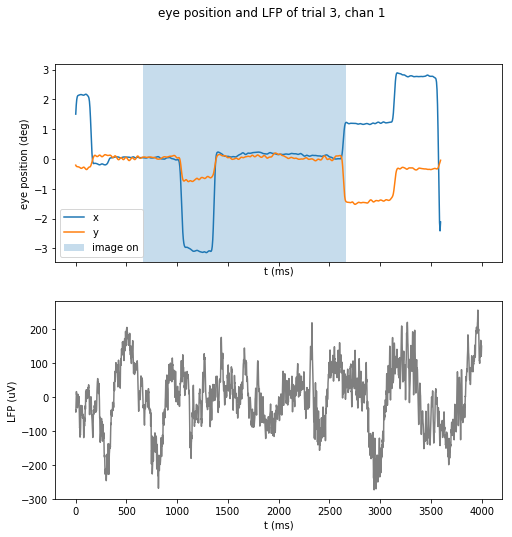

In [7]:
ch = 1           # index from 1, range between 1 and 48
trial_index = 3  # index from 0, range between 0 and num_trials-1

x = data_df.loc[trial_index, 'ems'][1]
y = data_df.loc[trial_index, 'ems'][2]
t = np.arange(len(data_df.loc[trial_index, 'ems'][1])) * data_df.loc[trial_index, 'ems'][0]
t_stimon  = data_df.loc[trial_index, 'stimon']
t_stimoff = data_df.loc[trial_index, 'stimoff']


h_fig, h_axes = plt.subplots(2, 1, sharex='all', figsize=[8, 8], squeeze=False)
plt.axes(h_axes[0, 0])
plt.plot(t, x)
plt.plot(t, y)
plt.axvspan(xmin=t_stimon, xmax=t_stimoff, alpha=0.25)
plt.xlabel('t (ms)')
plt.ylabel('eye position (deg)')
plt.legend(['x', 'y', 'image on'])

plt.axes(h_axes[1, 0])
plt.plot(data_neuro['ts']*1000, data_neuro['data'][trial_index, :, ch-1]*10**6, color='k', alpha=0.5)
plt.xlabel('t (ms)')
plt.ylabel('LFP (uV)')

plt.suptitle('eye position and LFP of trial {}, chan {}'.format(trial_index, ch))

plt.show()
plt.close()

## Save data to pickle format

it requires several packages to read from the original data.  To make is easier, I packaged `data_df` into `data_neuro` and save in pickle format.

* data_neuro: trial aligned neural data, a dictionary

In [8]:
data_neuro['trial_info'] = data_df

path_to_file = './temp_data/data_for_Seth.pickle'
with open(path_to_file, 'wb') as f:
    pickle.dump(data_neuro, f)

## Section 2: Load the saved data and work on it

Now you can use standard python package to load and analyze the processed data

In [9]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt

path_to_file = './temp_data/data_for_Seth.pickle'
with open(path_to_file, 'rb') as f:
    data_neuro = pickle.load(f)

data_df = data_neuro['trial_info']

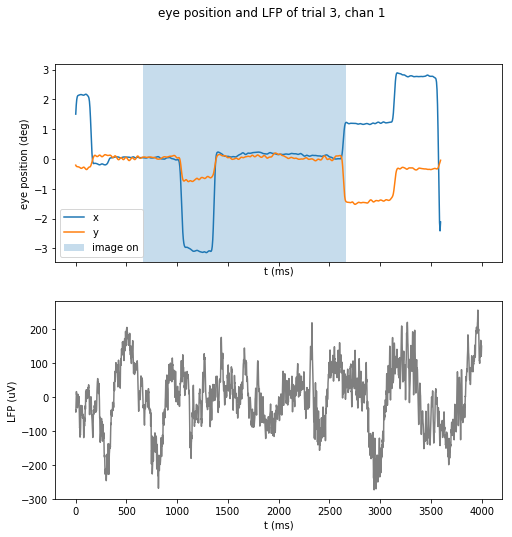

In [10]:
ch = 1           # index from 1, range between 1 and 48
trial_index = 3  # index from 0, range between 0 and num_trials-1

x = data_df.loc[trial_index, 'ems'][1]
y = data_df.loc[trial_index, 'ems'][2]
t = np.arange(len(data_df.loc[trial_index, 'ems'][1])) * data_df.loc[trial_index, 'ems'][0]
t_stimon  = data_df.loc[trial_index, 'stimon']
t_stimoff = data_df.loc[trial_index, 'stimoff']


h_fig, h_axes = plt.subplots(2, 1, sharex='all', figsize=[8, 8], squeeze=False)
plt.axes(h_axes[0, 0])
plt.plot(t, x)
plt.plot(t, y)
plt.axvspan(xmin=t_stimon, xmax=t_stimoff, alpha=0.25)
plt.xlabel('t (ms)')
plt.ylabel('eye position (deg)')
plt.legend(['x', 'y', 'image on'])

plt.axes(h_axes[1, 0])
plt.plot(data_neuro['ts']*1000, data_neuro['data'][trial_index, :, ch-1]*10**6, color='k', alpha=0.5)
plt.xlabel('t (ms)')
plt.ylabel('LFP (uV)')

plt.suptitle('eye position and LFP of trial {}, chan {}'.format(trial_index, ch))

plt.show()
plt.close()